In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from skimage.exposure import match_histograms

sys.path.append(str(Path("..").resolve()))
from src import *

Cupy Available= 1


# PSNR and SSIM comparisons between the averaged frame and the ground truth for different window sizes
This study will be used to determine the best window size for FFT Video Fusion.

In [2]:
# 40s
FRAMES = 6000
x_path = DATASETS["synthetic"].dir / "noise_1Q_-5.52dBSNR_490x490x6000.tif"
gt_path = DATASETS["synthetic"].dir / "clean_30Hz_490x490x6000.tif"
x, gt = (Recording(_, max_frames=FRAMES) for _ in [x_path, gt_path])

In [3]:
gt_frame = gt.np[FRAMES // 2]
data_range=np.max(gt_frame)-np.min(gt_frame)

In [4]:
wins = {}
df = pd.DataFrame(columns=["Window", "PSNR", "SSIM"]).set_index("Window")
for win in tqdm([2**i for i in range(13)]):
    wins[win] = match_histograms(x.avg_frame(FRAMES // 2, win), gt_frame)
    df.loc[win] = [
        psnr(gt_frame, wins[win], data_range),
        ssim(gt_frame, wins[win], data_range),
    ]

100%|██████████| 13/13 [00:02<00:00,  6.45it/s]


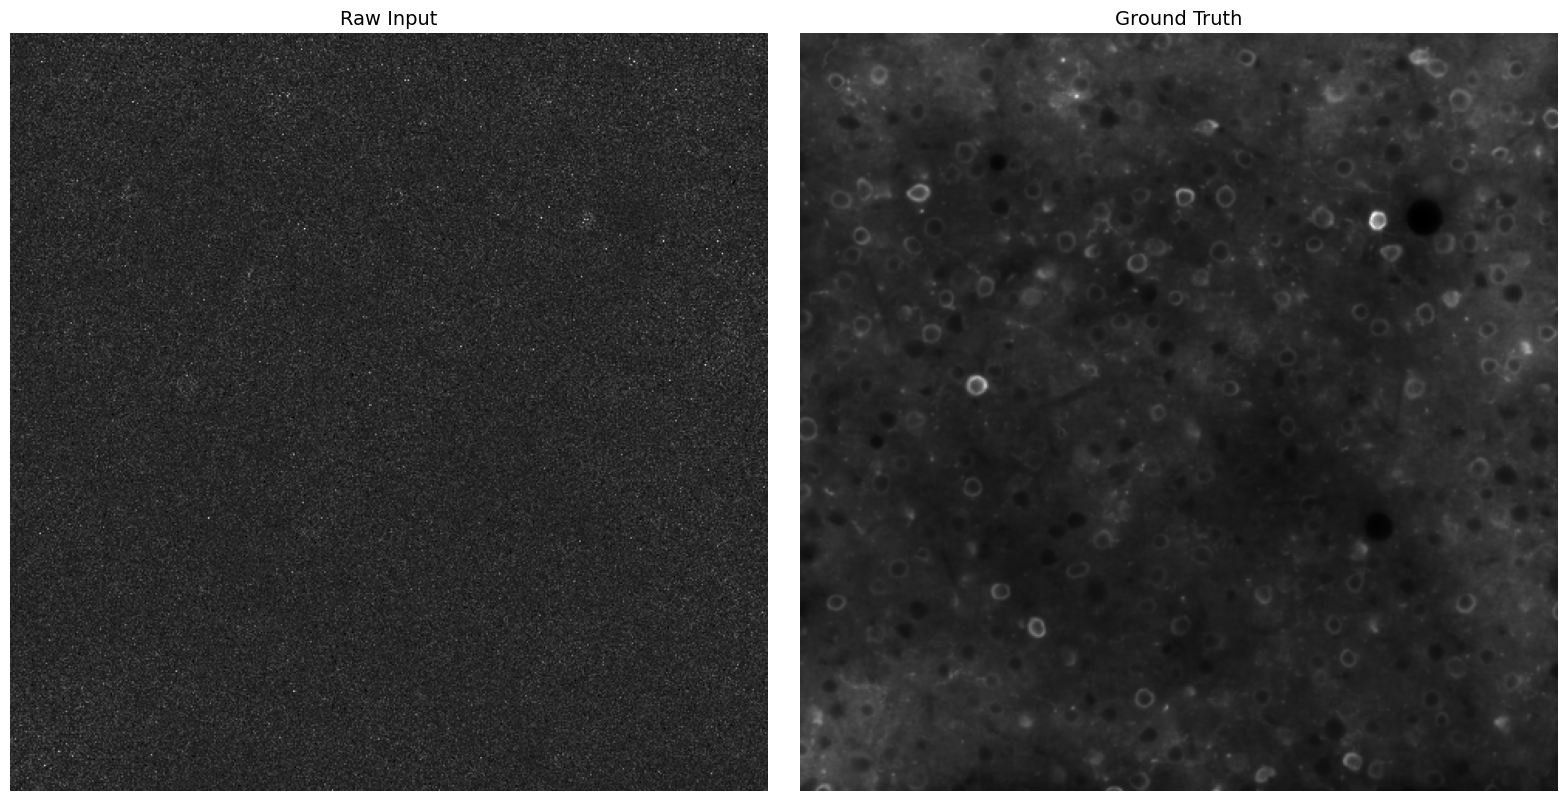

In [8]:
imshow({"Raw Input":wins[1], "Ground Truth": gt_frame}, size=8)

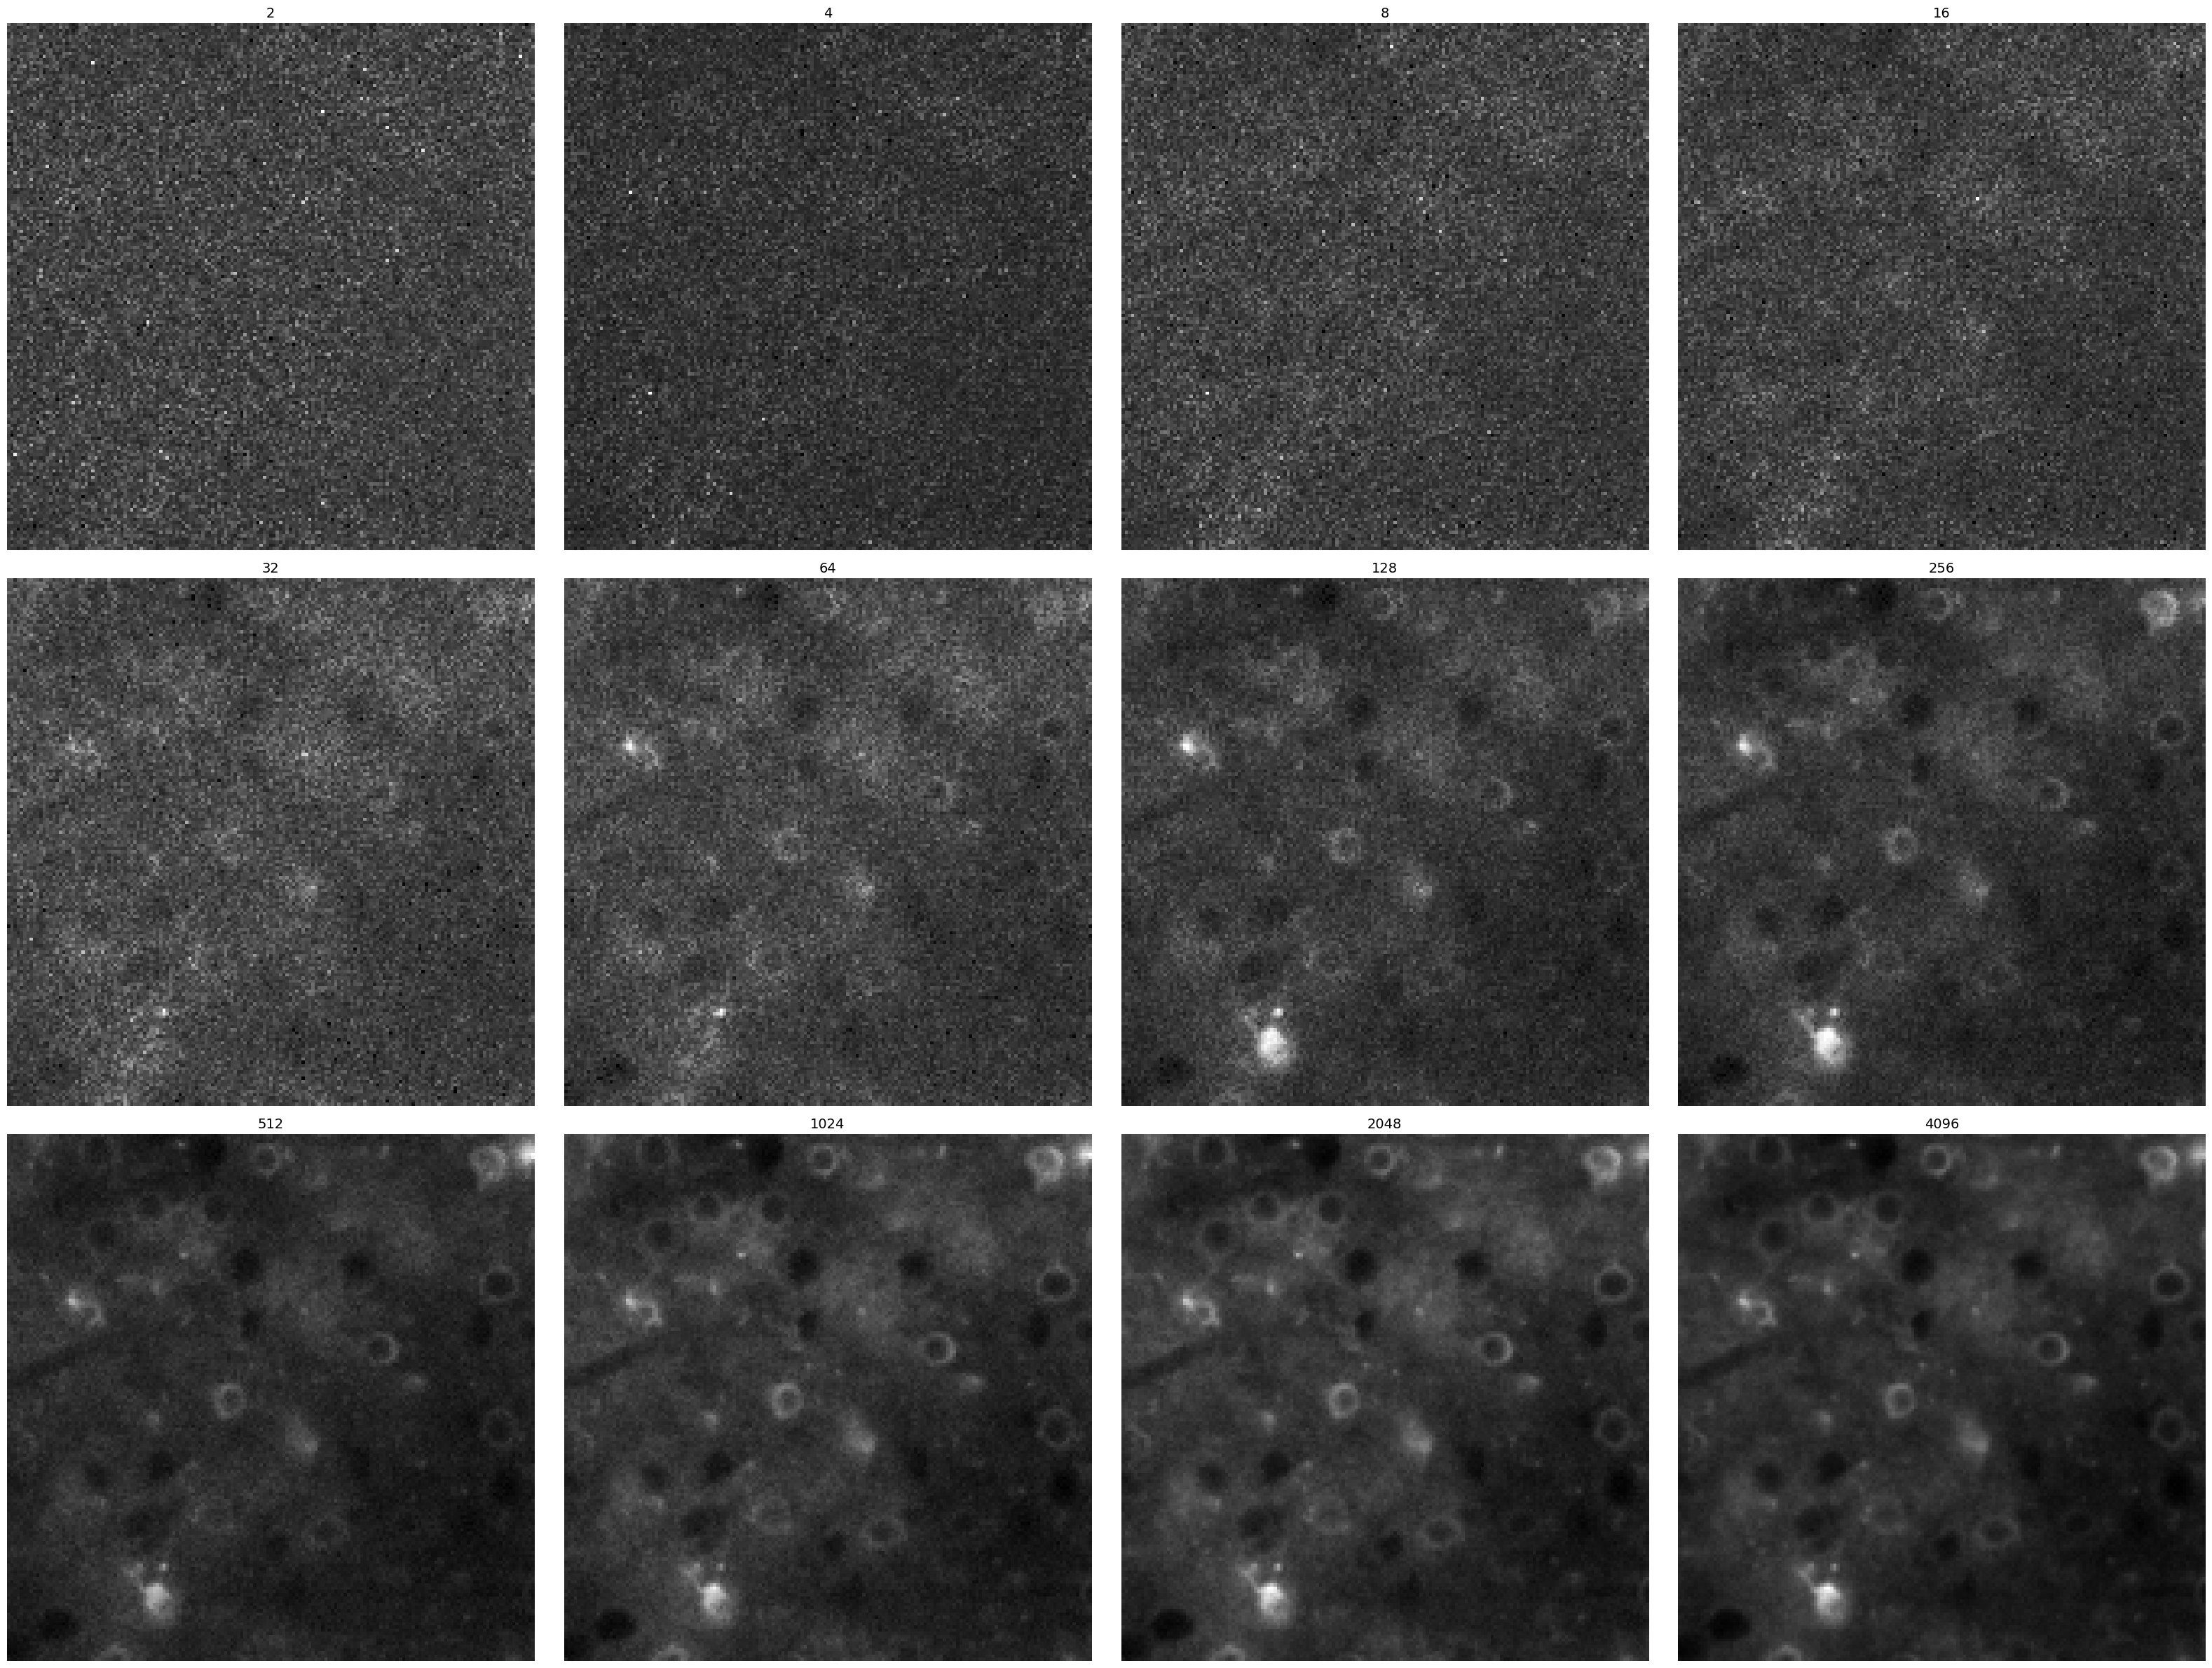

In [5]:
imshow(dict(list(wins.items())[1:]), cols=4,size=8,zoom=3)

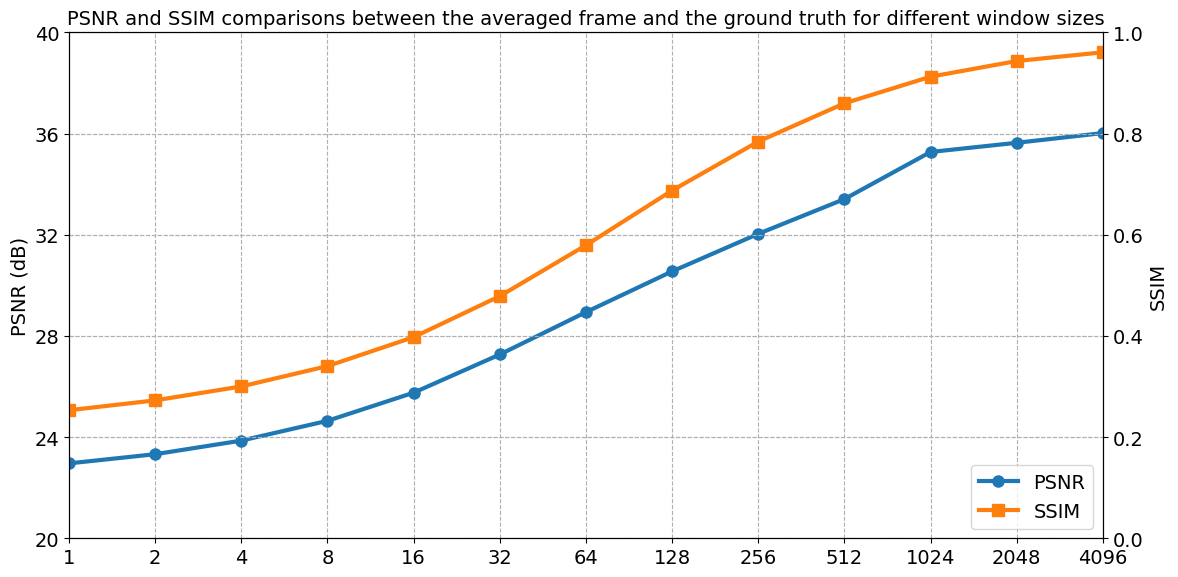

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title("PSNR and SSIM comparisons between the averaged frame and the ground truth for different window sizes")
ax1.set_xscale("log")
ax1.minorticks_off()
ax1.set_xlim(df.index.min(), df.index.max())
ax1.set_xticks([2**i for i in range(13)])
ax1.set_xticklabels([2**i for i in range(13)])

ax1.plot(df.index, df["PSNR"], marker="o", markersize=8, color="tab:blue", label="PSNR", linewidth=3)
ax1.set_ylabel("PSNR (dB)")
ax1.set_ylim(20, 40)
ax1.set_yticks(range(20, 41, 4))

ax2 = ax1.twinx()
ax2.plot(df.index, df["SSIM"], marker="s", markersize=8,linewidth=3, color="tab:orange", label="SSIM")
ax2.set_ylabel("SSIM")
ax2.set_ylim(0, 1)
ax2.set_yticks([0.2*i for i in range(6)])

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="lower right")
plt.tight_layout()
plt.show()

In the FFT video Fusion, we're going to use the maximum size (average the whole recording), because the method itself is designed to preserve dynamics.